# Exemplo Neural Network: Rede 2-1-1

## Carrega pacotes

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import lib.nn as nn

## Gera rede neural do primeiro exemplo

In [2]:
learning_rate = 0.5
neural = nn.NeuralNetwork(2, 1, 1,
                          hidden_layer_weights=[0.35, 0.25], 
                          hidden_layer_bias=0.65, 
                          output_layer_weights=[0.4], 
                          output_layer_bias=0.5)
neural.LEARNING_RATE = learning_rate
neural.inspect()

------
* Inputs: 2
------
Hidden Layer
Neurons: 1
 Neuron 0
  Weight: 0.35
  Weight: 0.25
  Bias: 0.65
------
* Output Layer
Neurons: 1
 Neuron 0
  Weight: 0.4
  Bias: 0.5
------


## Resultados antes do treinamento

In [3]:
print( 'MSE: {}'.format( round( neural.calculate_total_error( [[[0.05, 0.07], [0.99]]] ), 4 ) ) )

print( 'H_1: {}'.format( round( neural.hidden_layer.get_outputs()[0], 4) ) )

print( 'O_1: {}'.format( round( neural.output_layer.get_outputs()[0], 4) ) )

MSE: 0.0472
H_1: 0.6649
O_1: 0.6826


## Treina a rede

In [8]:
w_0 = []
w_1 = []
#epocas = 1
epocas = 5000
for i in range(epocas):
    neural.train([0.05, 0.1], [0.99])
    w_0.append(neural.hidden_layer.neurons[0].weights[0])
    w_1.append(neural.hidden_layer.neurons[0].weights[1])
    print( 'Época: {}/{} MSE: {}'.format(i, epocas-1, 
                                      round( neural.calculate_total_error( [[[0.05, 0.1], [0.99]]] ), 4 ) ), end = '\r' )

Época: 2216/4999 MSE: 0.0004

## Resultados após treinamento

### Rede

In [5]:
neural.inspect()

------
* Inputs: 2
------
Hidden Layer
Neurons: 1
 Neuron 0
  Weight: 0.35014789623073783
  Weight: 0.25029579246147576
  Bias: 0.65
------
* Output Layer
Neurons: 1
 Neuron 0
  Weight: 0.42217486615073346
  Bias: 0.5
------


### Projeções

In [6]:
# best rede
neural_best = nn.NeuralNetwork(2, 1, 1, 
                          hidden_layer_weights=[0.35, 0.25], 
                          hidden_layer_bias=0.65, 
                          output_layer_weights=[0.4], 
                          output_layer_bias=0.5)

neural_best.LEARNING_RATE = learning_rate

epocas = 10000
for i in range(epocas):
    neural_best.train([0.05, 0.1], [0.99])
    print( 'Época: {}/{} MSE: {}'.format(i, epocas-1, 
                                      round( neural_best.calculate_total_error( [[[0.05, 0.1], [0.99]]] ), 4 ) ), end = '\r' )

Época: 1643/9999 MSE: 0.0005

In [7]:
# rede
print( 'H_1: {}'.format( round( neural.hidden_layer.get_outputs()[0], 4) ) )
print( 'O_1: {}'.format( round( neural.output_layer.get_outputs()[0], 4) ) )

# best rede
print( 'H_1_best: {}'.format( round( neural_best.hidden_layer.get_outputs()[0], 4) ) )
print( 'O_1_best: {}'.format( round( neural_best.output_layer.get_outputs()[0], 4) ) )
print( 'w_best: {}'.format( neural_best.hidden_layer.neurons[0].weights ) )

H_1: 0.6665
O_1: 0.686
H_1_best: 0.6781
O_1_best: 0.9809
w_best: [0.5594838504997558, 0.6689677009995119]


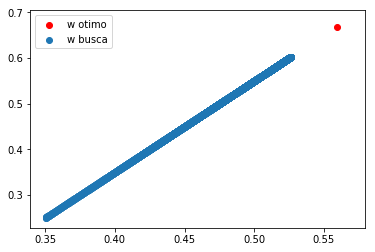

In [9]:
plt.scatter(neural_best.hidden_layer.neurons[0].weights[0], 
            neural_best.hidden_layer.neurons[0].weights[1], label = 'w otimo', color = 'red')
plt.scatter(w_0, w_1, label = 'w busca')
plt.legend( loc = 'upper left' )